In this scriptI use data augmentation to improve perfomance of the model

In [1]:
import pandas as pd 

X_test = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")

In [2]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y_train=train_data["label"]
X_train=train_data.drop(['label'],axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

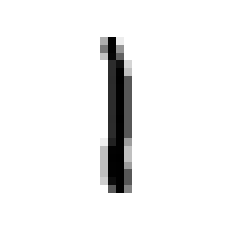

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

test_digit = X_train.iloc[1000].to_numpy()
test_digit_image = test_digit.reshape(28,28)

plt.imshow(test_digit_image,cmap="binary")
plt.axis("off")
plt.show

In [24]:
import scipy.ndimage as ndimage

test_digit_image_ipl=ndimage.shift(test_digit_image,[-10,0])

<function matplotlib.pyplot.show(*args, **kw)>

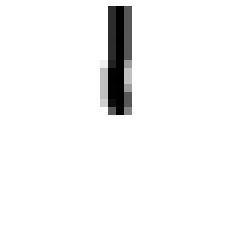

In [26]:
plt.imshow(test_digit_image_ipl
           ,cmap="binary")
plt.axis("off")
plt.show

In [1]:
def expand_data(train_data,train_label):
	
	X_train_expanded = train_data
	y_train_expanded = train_label
	columns_x_train = list(train_data)

	for i in range(len(train_data)):
		digit = train_data.iloc[i].to_numpy().reshape(28,28)
		
		down_skew = pd.DataFrame(ndimage.shift(digit,[1,0]).reshape(1,-1), columns=columns_x_train)
		up_skew = pd.DataFrame(ndimage.shift(digit,[-1,0]).reshape(1,-1), columns=columns_x_train) 
		left_skew = pd.DataFrame(ndimage.shift(digit,[0,-1]).reshape(1,-1), columns=columns_x_train)
		right_skew = pd.DataFrame(ndimage.shift(digit,[0,1]).reshape(1,-1), columns=columns_x_train)
		
		skewed_imgs = pd.concat([down_skew,up_skew,left_skew,right_skew],ignore_index=True, sort=False)
		X_train_expanded = X_train_expanded.append(skewed_imgs, ignore_index=True,sort=False)
		y_train_expanded = y_train_expanded.append(pd.Series([train_label.iloc[i]]*4),ignore_index=True)

	return y_train_expanded,X_train_expanded

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{'n_neighbors':[3,5,10],'weights':['uniform','distance']}]

kneighbours_class = KNeighborsClassifier()

r_grid_search = RandomizedSearchCV(kneighbours_class,param_grid,cv=5,scoring='accuracy',return_train_score=True, n_jobs=4, pre_dispatch=8, random_state=42)

r_grid_search.fit(X_train,y_train)

In [ ]:
X_train_expand,y_train_expand = expand_data(X_train[:5000],y_train[:5000])
r_grid_search.fit(X_train_exp,y_train_exp)
best_model_r = r_grid_search.best_estimator_

In [ ]:
final_predictions=best_model_r.predict(X_test)

In [19]:
output=pd.DataFrame({'ImageId':X_test.index+1,'Label':final_predictions})

In [22]:
output.to_csv("mnist_kaggle.csv",index=False)

In [25]:
!kaggle competitions submit -c digit-recognizer -f mnist_kaggle.csv -m "msg"

Successfully submitted to Digit Recognizer



  0%|          | 0.00/235k [00:00<?, ?B/s]
 82%|########1 | 192k/235k [00:00<00:00, 1.93MB/s]
100%|##########| 235k/235k [00:03<00:00, 64.3kB/s]
